# FUNCIONES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import re
import numpy as np

def graph_mtree(name_file, size, max_size):
    colors = ['red', 'green', 'red', 'orange', 'blue', 'purple']
    cmap = plt.cm.viridis

    # Function to parse the custom data format
    def parse_data(row):
        p_match = re.search(r'p:\(([^)]+)\)', row)
        h_match = re.search(r'h:(\d+)', row)
        n_match = re.search(r'n:(\d+)', row)
        cr_match = re.search(r'cr:(\d+.\d+)', row)
        if (not cr_match):
            cr_match = re.search(r'cr:(\d+)', row)

        if not (p_match and h_match and cr_match and n_match):
            return None  # Return None if any patterns do not match
        
        p = tuple(map(float, p_match.group(1).split(',')))
        h = int(h_match.group(1))
        cr = float(cr_match.group(1))
        n = int(n_match.group(1))
        return p, h, cr, n

    # Read the CSV file
    df = pd.read_csv(name_file, header=None, delimiter=";")

    # Prepare the plot
    fig, ax = plt.subplots(figsize=(10, 10))

    # Find min and max h values for normalization
    min_h = df[0].apply(lambda x: int(re.search(r'h:(\d+)', x).group(1))).min()
    max_h = df[0].apply(lambda x: int(re.search(r'h:(\d+)', x).group(1))).max()
    norm = mcolors.Normalize(vmin=min_h, vmax=max_h)

    # Process each row in the DataFrame
    for index, row in df.iterrows():
        result = parse_data(row[0])
        if result:
            p, h, cr, n = result

            if n == 0:
                markersize = max(0.5*(max_size-size), 0.4);
                ax.plot(p[0], p[1], 'bo', markersize=markersize)
            else:
                color = colors[h % len(colors)]
                circle = plt.Circle(p, cr, color=color, fill=False)  # Draw a red circle for n!=0
                ax.add_artist(circle)

    # Set equal scaling by setting the aspect ratio to 'equal'
    ax.set_aspect('equal', adjustable='datalim')
    plt.grid(True)
    plt.show()


In [3]:
import pandas as pd
import numpy as np
from scipy.stats import norm

def read_data(file_path):
    """Reads a CSV file directly into a DataFrame with correct types."""
    # Using a more direct approach to parsing the CSV
    data = pd.read_csv(file_path, delimiter=';', header=None)
    data = data[0].str.extract(r'size:(?P<size>\d+),ios:(?P<ios>\d+)')
    data['size'] = pd.to_numeric(data['size'])
    data['ios'] = pd.to_numeric(data['ios'])
    return data

def calculate_confidence_interval(data, confidence=0.95):
    """Calculates the confidence interval for a given dataset of ios values."""
    n = len(data)
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)  # ddof=1 for sample standard deviation
    z_score = norm.ppf((1 + confidence) / 2)  # Get z-score from the normal distribution
    margin_error = z_score * (std_dev / np.sqrt(n))
    return mean, mean - margin_error, mean + margin_error

def analyze_file(file_path):
    data = read_data(file_path)
    ios_mean, ios_lower_bound, ios_upper_bound = calculate_confidence_interval(data['ios'])
    size_mean = np.mean(data['size'])
    return {
        'IOS Mean': ios_mean,
        'IOS 95% CI Lower': ios_lower_bound,
        'IOS 95% CI Upper': ios_upper_bound,
        'Size Mean': size_mean
    }

In [4]:
import matplotlib.pyplot as plt

def graph_time(directory: str, max_size: int) -> None:
    # Initialize lists to store the computation times and corresponding sizes
    times = []
    sizes = []

    # Loop through each file in the directory
    for power in range(10, max_size+1):
        filename = f"{directory}/{power}.csv"
        size =  2**power  # Calculate the size as 2^power
        with open(filename, 'r') as file:
            time = float(file.readline().strip())  # Read the time from the file
            times.append(time)
            sizes.append(size)

    # Sort the data by size (this step is important if the file names are not in order)
    sorted_indices = sorted(range(len(sizes)), key=lambda k: sizes[k])
    sizes = [sizes[i] for i in sorted_indices]
    times = [times[i] for i in sorted_indices]
    return sizes, times

# RESULTADOS

## I/Os 

Método CP

Size Sample = 2^10, I/OS Mean:     4.01, I/OS 95% CI: (    3.954963,     4.062615), Size Mean:     1.26
Size Sample = 2^11, I/OS Mean:     4.62, I/OS 95% CI: (    4.569241,     4.673923), Size Mean:     2.50
Size Sample = 2^12, I/OS Mean:     5.14, I/OS 95% CI: (    5.077618,     5.200703), Size Mean:     5.06
Size Sample = 2^13, I/OS Mean:     5.59, I/OS 95% CI: (    5.524405,     5.656259), Size Mean:    10.07
Size Sample = 2^14, I/OS Mean:     7.95, I/OS 95% CI: (    7.876908,     8.029342), Size Mean:    20.24
Size Sample = 2^15, I/OS Mean:    10.91, I/OS 95% CI: (   10.810359,    11.003117), Size Mean:    40.42
Size Sample = 2^16, I/OS Mean:    13.23, I/OS 95% CI: (   13.118627,    13.331568), Size Mean:    80.99
Size Sample = 2^17, I/OS Mean:    15.61, I/OS 95% CI: (   15.489634,    15.738881), Size Mean:   161.89
Size Sample = 2^18, I/OS Mean:    19.99, I/OS 95% CI: (   19.867320,    20.112172), Size Mean:   323.75
Size Sample = 2^19, I/OS Mean:    27.42, I/OS 95% CI:

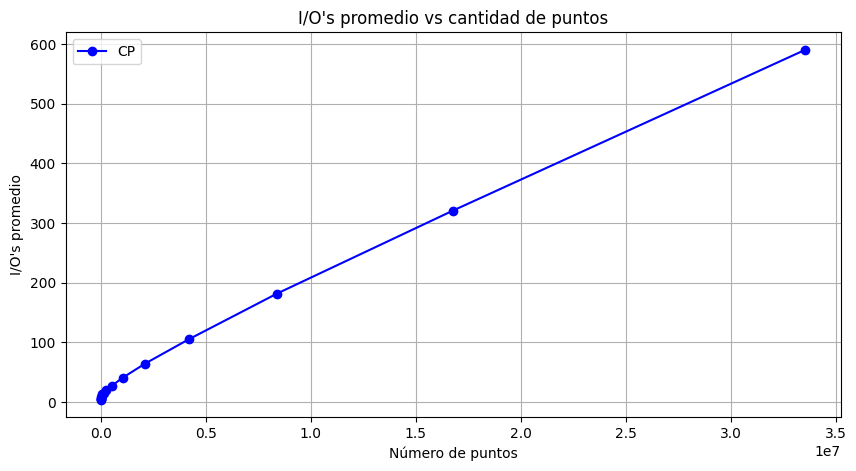

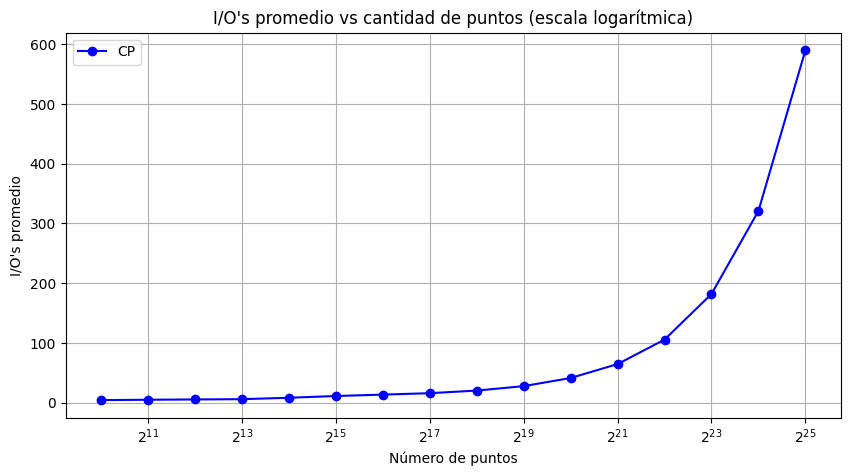

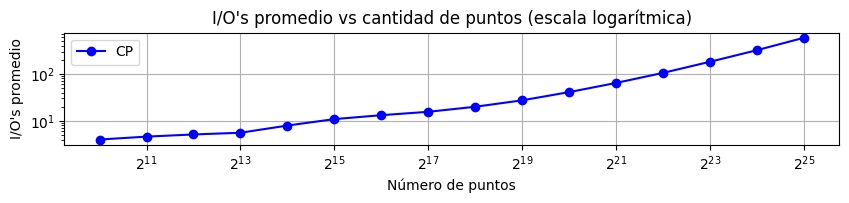

In [5]:
sizes_cp = []
ios_cp = []
print("Método CP\n")
for size in range(10, 26):
    file_path = f'cp/search/result/{size}.csv'
    results = analyze_file(file_path)
    print(f"Size Sample = 2^{size}, ", end="")
    print(f"I/OS Mean: {results['IOS Mean']:>8.2f}, I/OS 95% CI: ({results['IOS 95% CI Lower']:>12.6f}, {results['IOS 95% CI Upper']:>12.6f}), Size Mean: {results['Size Mean']:>8.2f}")
    sizes_cp += [2**size]
    ios_cp += [results['IOS Mean']]



plt.figure(figsize=(10, 5))
plt.plot(sizes_cp, ios_cp, marker='o', linestyle='-', color='b', label='CP')
plt.title("I/O's promedio vs cantidad de puntos")
plt.xlabel('Número de puntos')
plt.ylabel("I/O's promedio")
plt.xscale('linear')
plt.yscale('linear')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(sizes_cp, ios_cp, marker='o', linestyle='-', color='b', label='CP')
plt.title("I/O's promedio vs cantidad de puntos (escala logarítmica)")
plt.xlabel('Número de puntos')
plt.ylabel("I/O's promedio")
plt.xscale('log', base=2)
plt.yscale('linear')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(sizes_cp, ios_cp, marker='o', linestyle='-', color='b', label='CP')
plt.title("I/O's promedio vs cantidad de puntos (escala logarítmica)")
plt.xlabel('Número de puntos')
plt.ylabel("I/O's promedio")
plt.xscale('log', base=2)
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Método SS

Size Sample = 2^10, I/OS Mean:     3.45, I/OS 95% CI: (    3.407751,     3.483850), Size Mean:     1.26
Size Sample = 2^11, I/OS Mean:     3.85, I/OS 95% CI: (    3.806001,     3.887358), Size Mean:     2.50
Size Sample = 2^12, I/OS Mean:     4.14, I/OS 95% CI: (    4.094115,     4.189089), Size Mean:     5.06
Size Sample = 2^13, I/OS Mean:     4.46, I/OS 95% CI: (    4.420952,     4.500923), Size Mean:    10.07
Size Sample = 2^14, I/OS Mean:     6.12, I/OS 95% CI: (    6.056827,     6.178524), Size Mean:    20.24
Size Sample = 2^15, I/OS Mean:     7.27, I/OS 95% CI: (    7.204514,     7.334548), Size Mean:    40.42
Size Sample = 2^16, I/OS Mean:     9.36, I/OS 95% CI: (    9.293858,     9.432705), Size Mean:    80.99


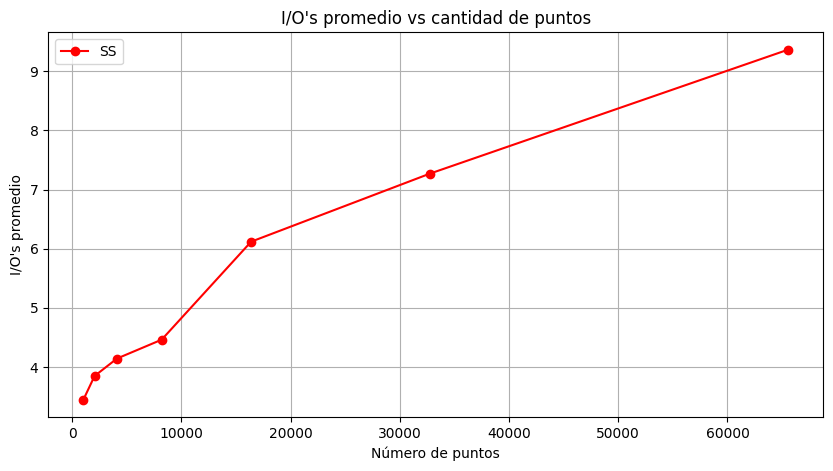

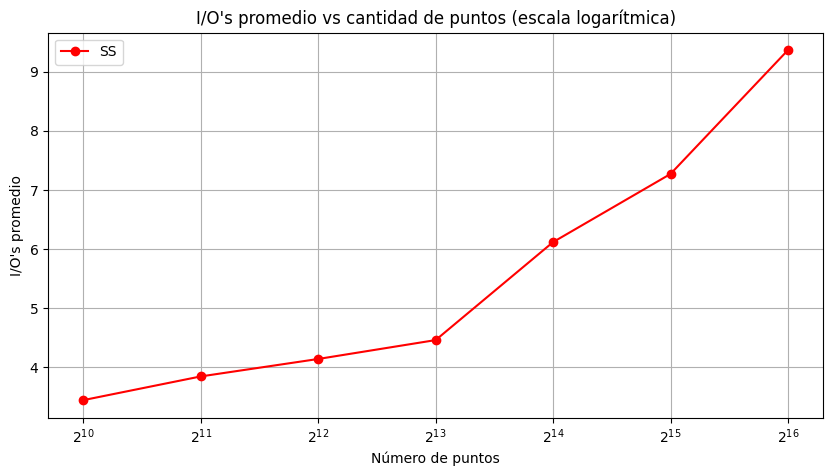

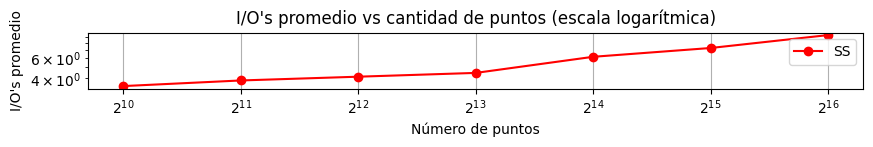

In [11]:
ios_cp = []
sizes_cp = []

print("Método SS\n")
for size in range(10, 17):
    file_path = f'ss/search/result/{size}.csv'
    results = analyze_file(file_path)
    print(f"Size Sample = 2^{size}, ", end="")
    print(f"I/OS Mean: {results['IOS Mean']:>8.2f}, I/OS 95% CI: ({results['IOS 95% CI Lower']:>12.6f}, {results['IOS 95% CI Upper']:>12.6f}), Size Mean: {results['Size Mean']:>8.2f}")
    sizes_cp += [2**size]
    ios_cp += [results['IOS Mean']]

plt.figure(figsize=(10, 5))
plt.plot(sizes_cp, ios_cp, marker='o', linestyle='-', color='r', label='SS')
plt.title("I/O's promedio vs cantidad de puntos")
plt.xlabel('Número de puntos')
plt.ylabel("I/O's promedio")
plt.xscale('linear')
plt.yscale('linear')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(sizes_cp, ios_cp, marker='o', linestyle='-', color='r', label='SS')
plt.title("I/O's promedio vs cantidad de puntos (escala logarítmica)")
plt.xlabel('Número de puntos')
plt.ylabel("I/O's promedio")
plt.xscale('log', base=2)
plt.yscale('linear')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(sizes_cp, ios_cp, marker='o', linestyle='-', color='r', label='SS')
plt.title("I/O's promedio vs cantidad de puntos (escala logarítmica)")
plt.xlabel('Número de puntos')
plt.ylabel("I/O's promedio")
plt.xscale('log', base=2)
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

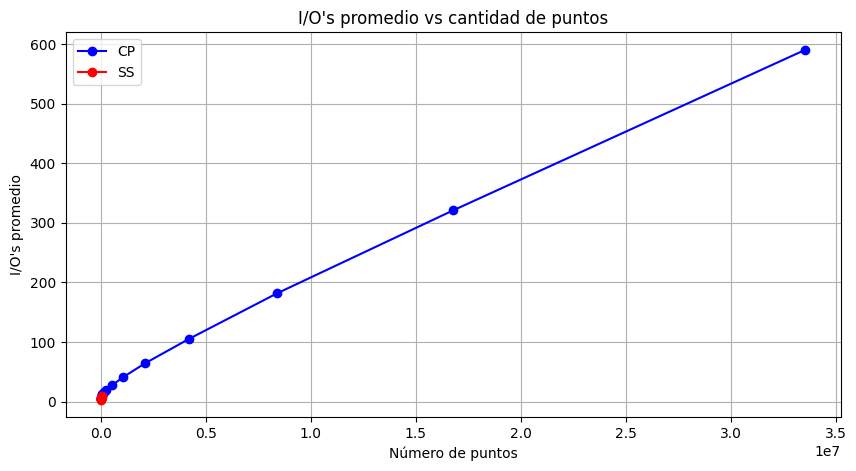

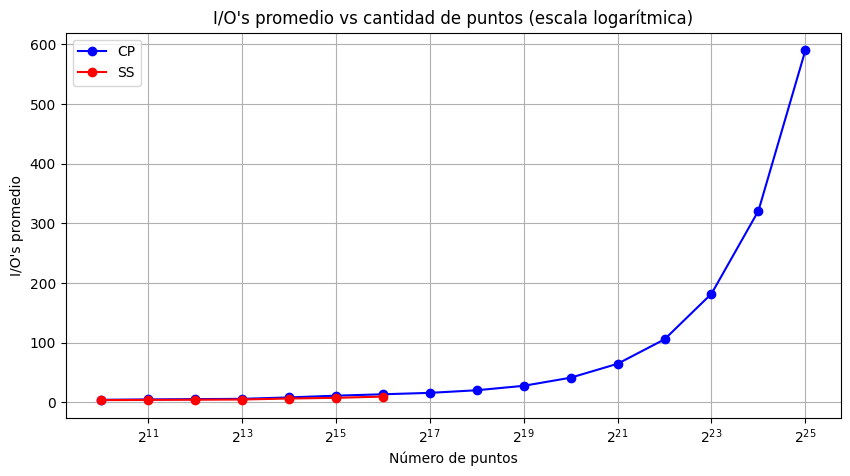

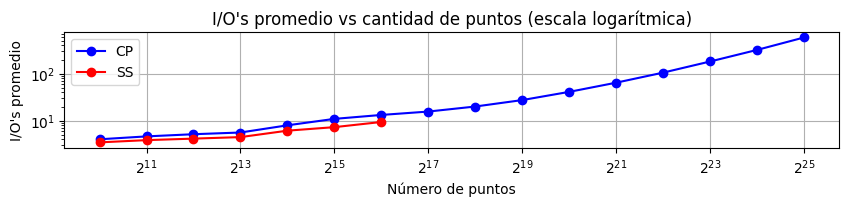

In [21]:
sizes_cp = [2**x for x in range(10, 26)]
ios_cp = []
for size in range(10, 26):
    file_path = f'cp/search/result/{size}.csv'
    results = analyze_file(file_path)
    ios_cp += [results['IOS Mean']]

sizes_ss = [2**x for x in range(10, 17)]
ios_ss = []
for size in range(10, 17):
    file_path = f'ss/search/result/{size}.csv'
    results = analyze_file(file_path)
    ios_ss += [results['IOS Mean']]

plt.figure(figsize=(10, 5))
plt.plot(sizes_cp, ios_cp, marker='o', linestyle='-', color='b', label='CP')
plt.plot(sizes_ss, ios_ss, marker='o', linestyle='-', color='r', label='SS')
plt.title("I/O's promedio vs cantidad de puntos")
plt.xlabel('Número de puntos')
plt.ylabel("I/O's promedio")
plt.xscale('linear')
plt.yscale('linear')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(sizes_cp, ios_cp, marker='o', linestyle='-', color='b', label='CP')
plt.plot(sizes_ss, ios_ss, marker='o', linestyle='-', color='r', label='SS')
plt.title("I/O's promedio vs cantidad de puntos (escala logarítmica)")
plt.xlabel('Número de puntos')
plt.ylabel("I/O's promedio")
plt.xscale('log', base=2)
plt.yscale('linear')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(sizes_cp, ios_cp, marker='o', linestyle='-', color='b', label='CP')
plt.plot(sizes_ss, ios_ss, marker='o', linestyle='-', color='r', label='SS')
plt.title("I/O's promedio vs cantidad de puntos (escala logarítmica)")
plt.xlabel('Número de puntos')
plt.ylabel("I/O's promedio")
plt.xscale('log', base=2)
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## Tiempo de búsqueda

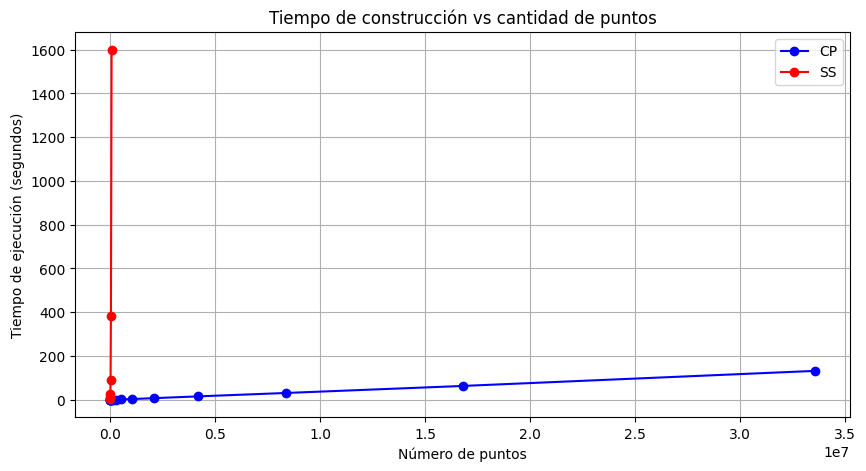

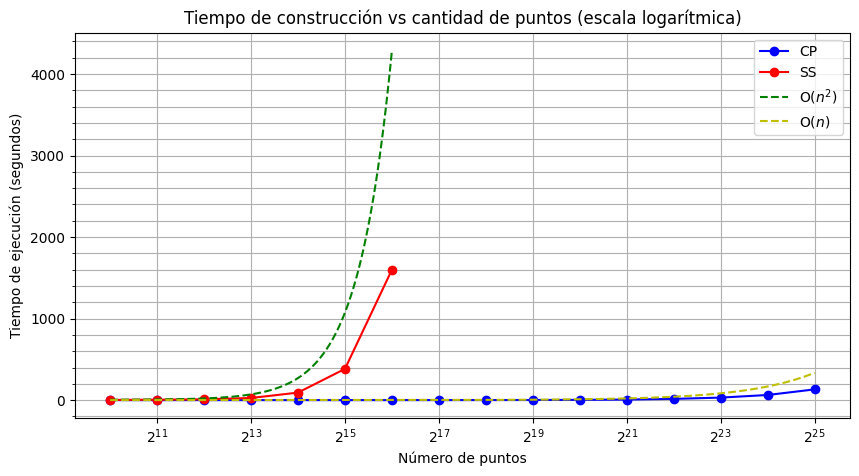

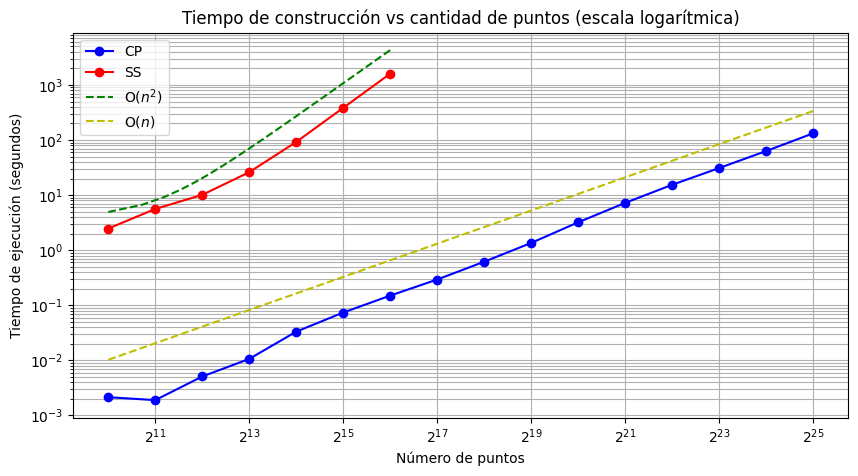

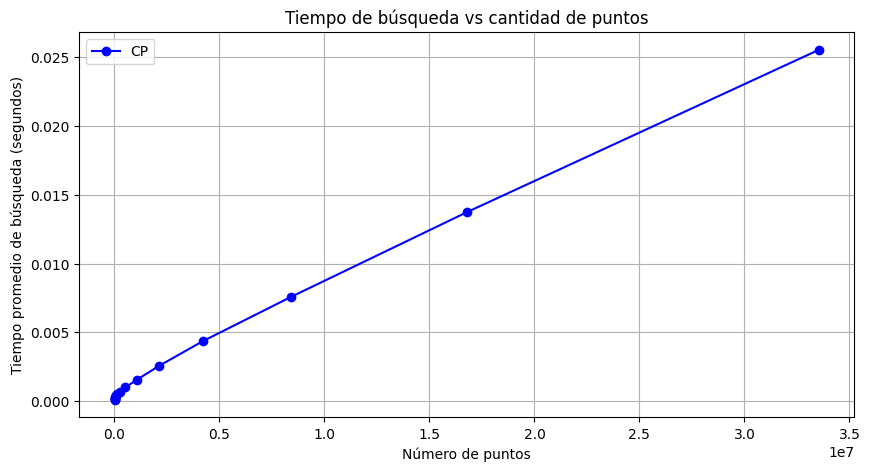

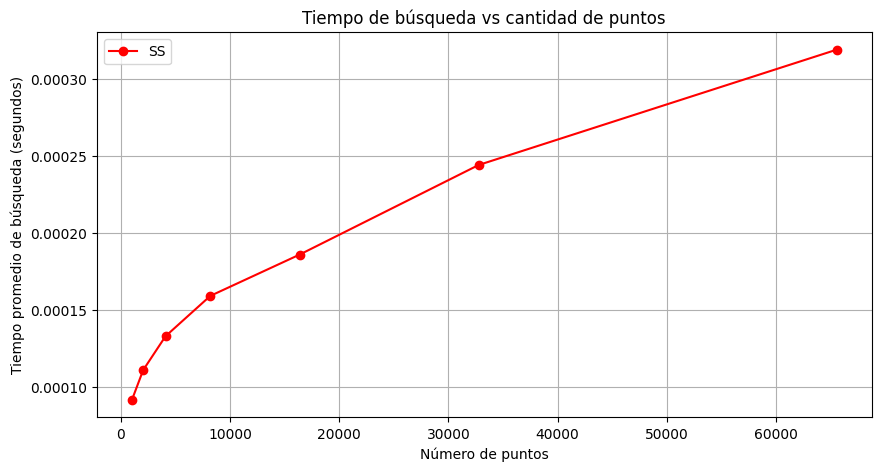

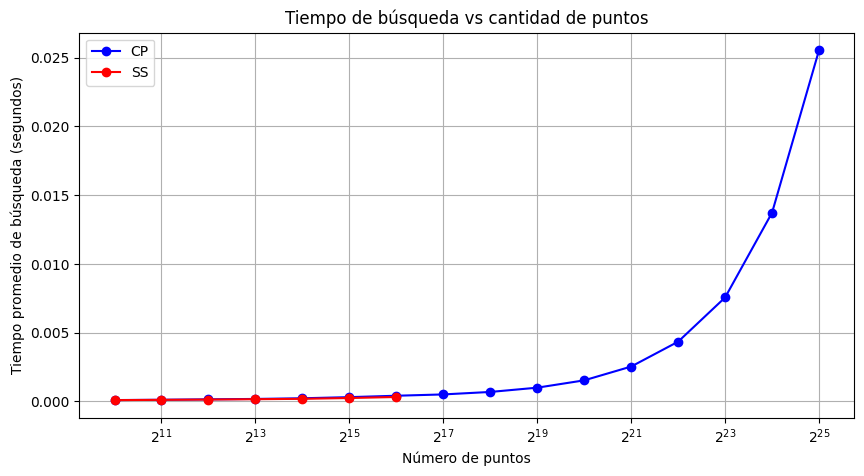

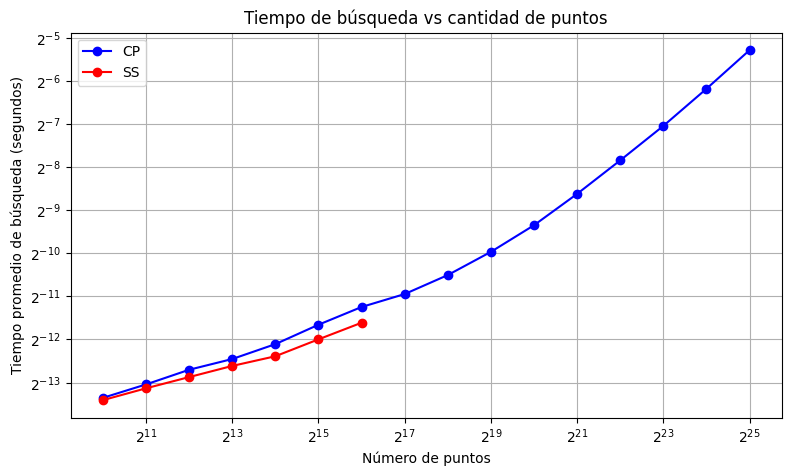

In [13]:
max_cp_size = 25
max_ss_size = 16

# Quadratic Curve
x1 = np.linspace(2**10, 2**max_ss_size, 100)
a, b, c = 1/1000000, -1/10000, 4
y1 = a * x1**2 + b * x1 + c

# n
x2 = np.linspace(2**10, 2**max_cp_size, 100)
a, b, c = 1/100000, 0, 0
y2 = a * x2 + b * x2 + c


plt.figure(figsize=(10, 5))

# CP
sizes_cp, times = graph_time("cp/mtree/time", max_cp_size)
plt.plot(sizes_cp, times, marker='o', linestyle='-', color='b', label='CP')

# SS
sizes_cp, times = graph_time("ss/mtree/time", max_ss_size)
plt.plot(sizes_cp, times, marker='o', linestyle='-', color='r', label='SS')

plt.title('Tiempo de construcción vs cantidad de puntos')
plt.xlabel('Número de puntos')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.xscale('linear')

plt.grid(True)
plt.legend()
plt.show()

"================================================================"

plt.figure(figsize=(10, 5))

# CP
sizes_cp, times = graph_time("cp/mtree/time", max_cp_size)
plt.plot(sizes_cp, times, marker='o', linestyle='-', color='b', label='CP')

# SS
sizes_cp, times = graph_time("ss/mtree/time", max_ss_size)
plt.plot(sizes_cp, times, marker='o', linestyle='-', color='r', label='SS')

plt.plot(x1, y1, linestyle='--', color='g', label='O($n^2$)')
plt.plot(x2, y2, linestyle='--', color='y', label='O($n$)')

plt.title('Tiempo de construcción vs cantidad de puntos (escala logarítmica)')
plt.xlabel('Número de puntos')
plt.ylabel('Tiempo de ejecución (segundos)')

plt.xscale('log', base=2)

plt.grid(True, which='both')  # Major and minor grids
plt.minorticks_on()  # Turn on the minor ticks

plt.legend()
plt.show()

"================================================================"

plt.figure(figsize=(10, 5))

# CP
sizes_cp, times = graph_time("cp/mtree/time", max_cp_size)
plt.plot(sizes_cp, times, marker='o', linestyle='-', color='b', label='CP')

# SS
sizes_cp, times = graph_time("ss/mtree/time", max_ss_size)
plt.plot(sizes_cp, times, marker='o', linestyle='-', color='r', label='SS')

plt.title('Tiempo de construcción vs cantidad de puntos (escala logarítmica)')
plt.xlabel('Número de puntos')
plt.ylabel('Tiempo de ejecución (segundos)')

plt.plot(x1, y1, linestyle='--', color='g', label='O($n^2$)')
plt.plot(x2, y2, linestyle='--', color='y', label='O($n$)')


plt.xscale('log', base=2)
plt.yscale('log')

plt.grid(True, which='both')  # Major and minor grids
plt.minorticks_on()  # Turn on the minor ticks

plt.legend()
plt.show()

"================================================================"

plt.figure(figsize=(10, 5))

# CP
sizes_cp, times = graph_time("cp/search/time", max_cp_size)
plt.plot(sizes_cp, [x/100 for x in times], marker='o', linestyle='-', color='b', label='CP')

plt.title('Tiempo de búsqueda vs cantidad de puntos')
plt.xlabel('Número de puntos')
plt.ylabel('Tiempo promedio de búsqueda (segundos)')

plt.xscale('linear')
plt.yscale('linear')

plt.grid(True)
plt.legend()
plt.show()

"================================================================"

plt.figure(figsize=(10, 5))

# CP
sizes_cp, times = graph_time("ss/search/time", max_ss_size)
plt.plot(sizes_cp, [x/100 for x in times], marker='o', linestyle='-', color='r', label='SS')

plt.title('Tiempo de búsqueda vs cantidad de puntos')
plt.xlabel('Número de puntos')
plt.ylabel('Tiempo promedio de búsqueda (segundos)')

plt.xscale('linear')
plt.yscale('linear')

plt.grid(True)
plt.legend()
plt.show()

"================================================================"

plt.figure(figsize=(10, 5))

# CP
sizes_cp, times = graph_time("cp/search/time", max_cp_size)
plt.plot(sizes_cp, [x/100 for x in times], marker='o', linestyle='-', color='b', label='CP')

# SS
sizes_cp, times = graph_time("ss/search/time", max_ss_size)
plt.plot(sizes_cp, [x/100 for x in times], marker='o', linestyle='-', color='r', label='SS')

plt.title('Tiempo de búsqueda vs cantidad de puntos')
plt.xlabel('Número de puntos')
plt.ylabel('Tiempo promedio de búsqueda (segundos)')

plt.xscale('log', base=2)
plt.yscale('linear')

plt.grid(True)
plt.legend()
plt.show()


"================================================================"

plt.figure(figsize=(10, 5))

# CP
sizes_cp, times = graph_time("cp/search/time", max_cp_size)
plt.plot(sizes_cp, [x/100 for x in times], marker='o', linestyle='-', color='b', label='CP')

# SS
sizes_cp, times = graph_time("ss/search/time", max_ss_size)
plt.plot(sizes_cp, [x/100 for x in times], marker='o', linestyle='-', color='r', label='SS')

plt.title('Tiempo de búsqueda vs cantidad de puntos')
plt.xlabel('Número de puntos')
plt.ylabel('Tiempo promedio de búsqueda (segundos)')

plt.xscale('log', base=2)
plt.yscale('log', base=2)

plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

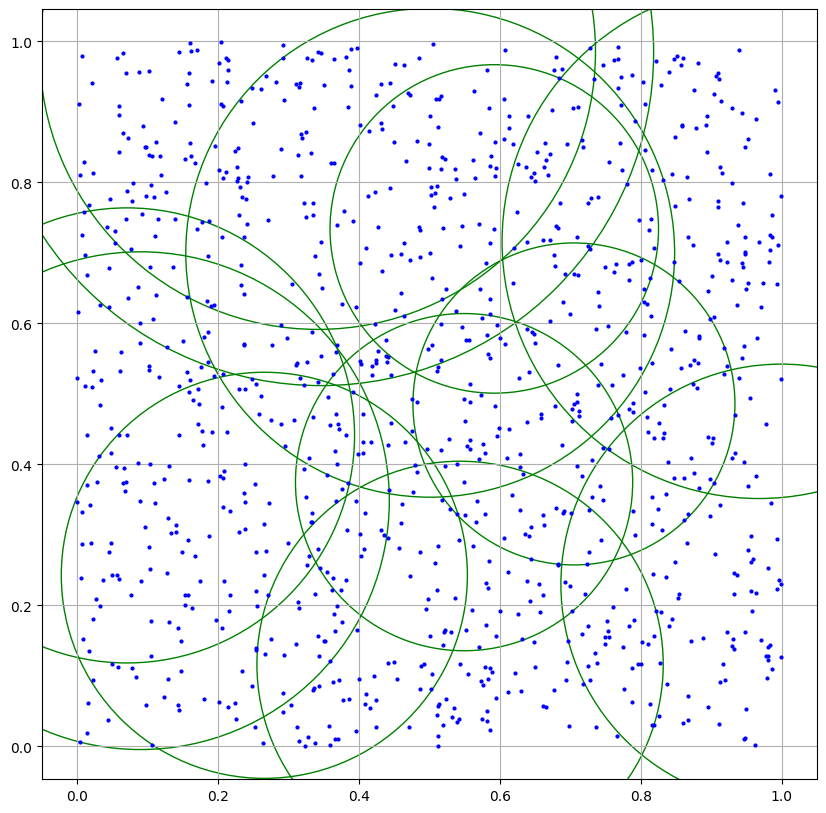

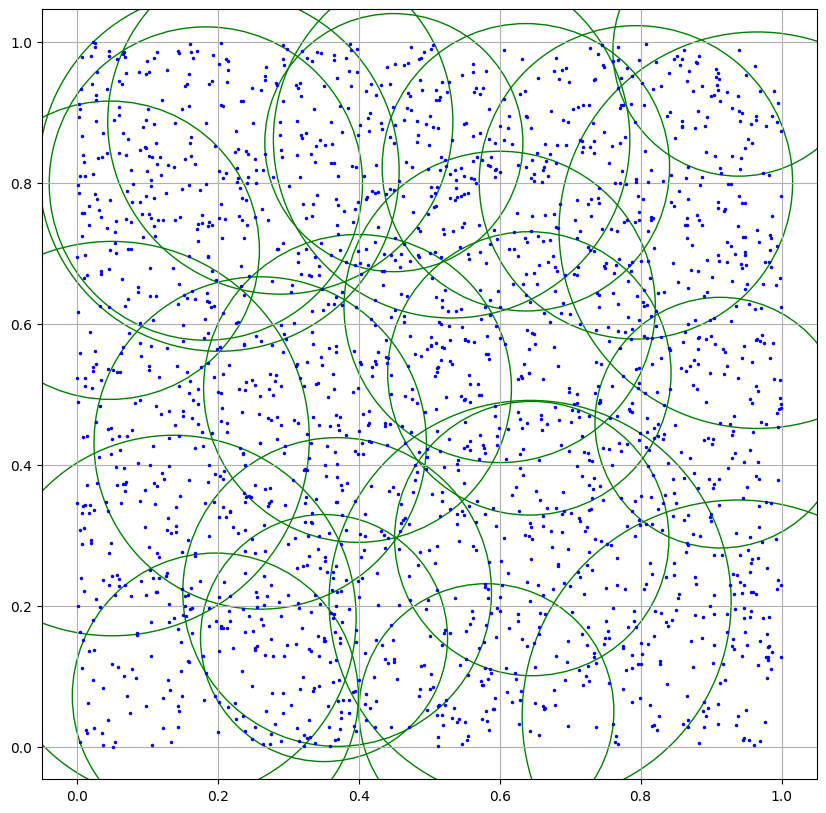

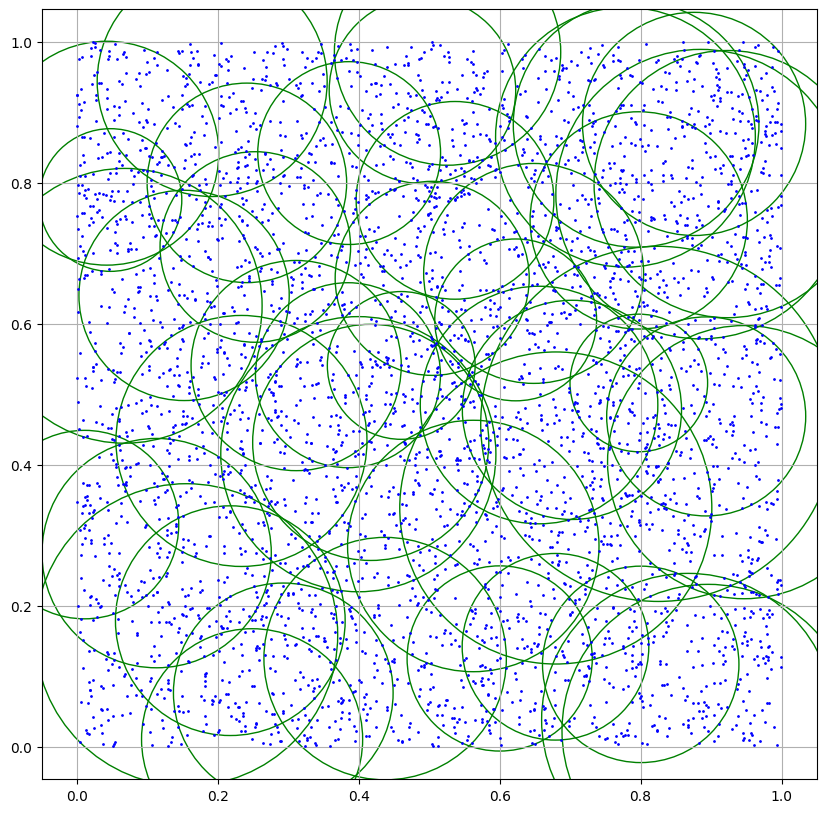

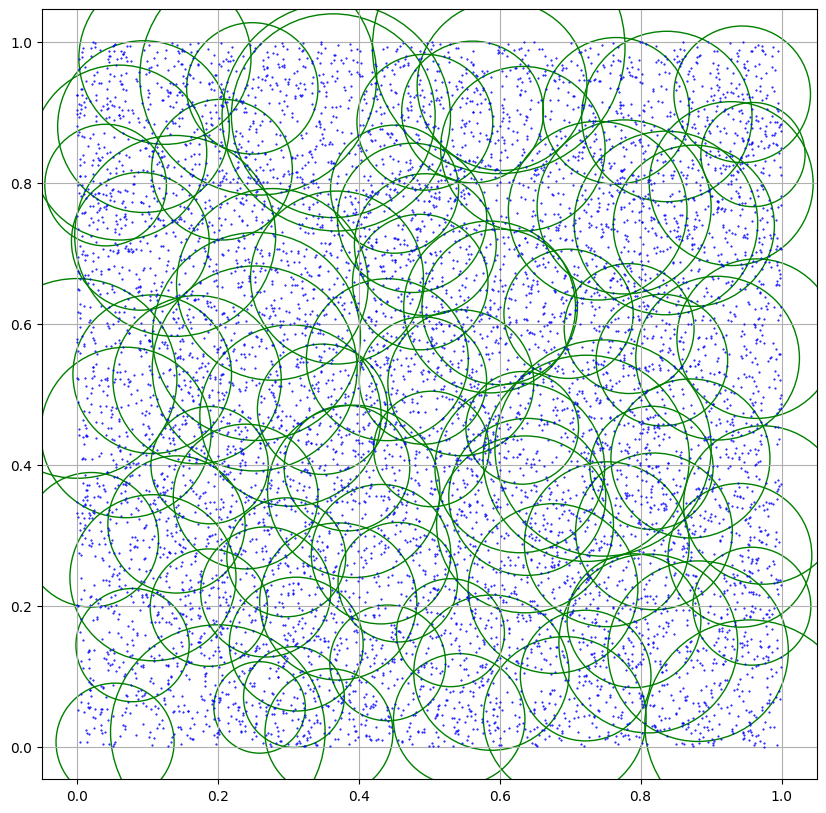

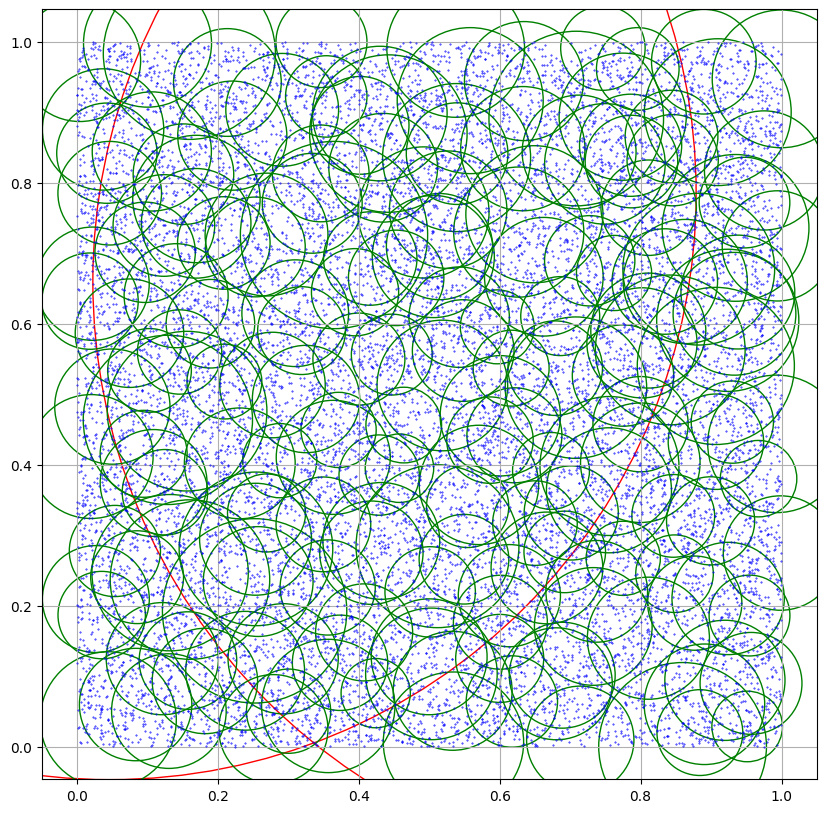

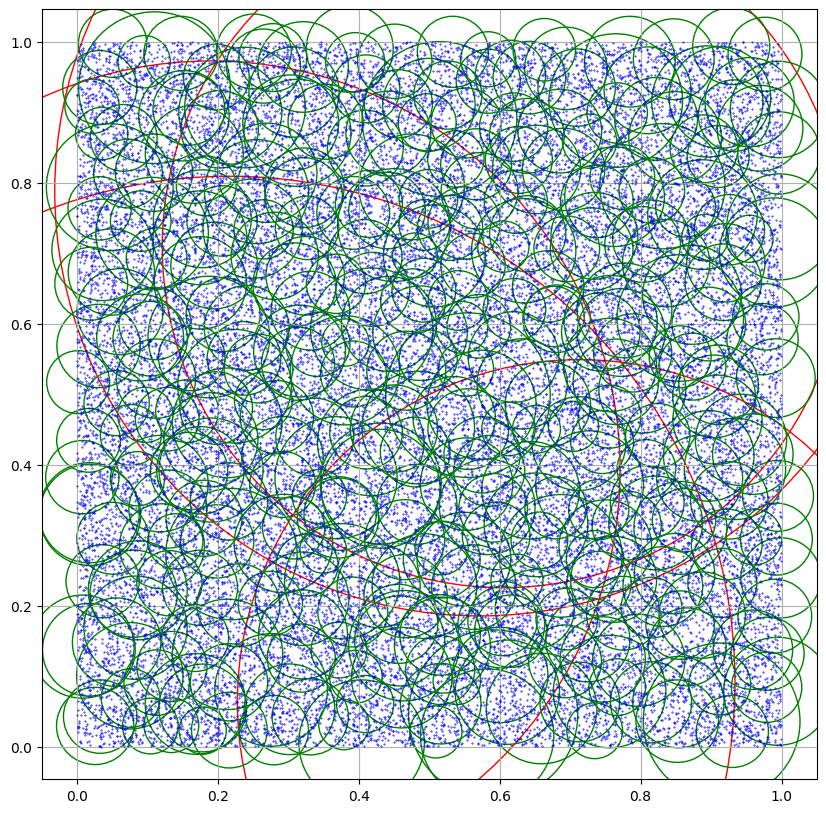

In [9]:
for size in range(10, 16):
    graph_mtree(f"cp/mtree/result/{size}.csv", size, 14)

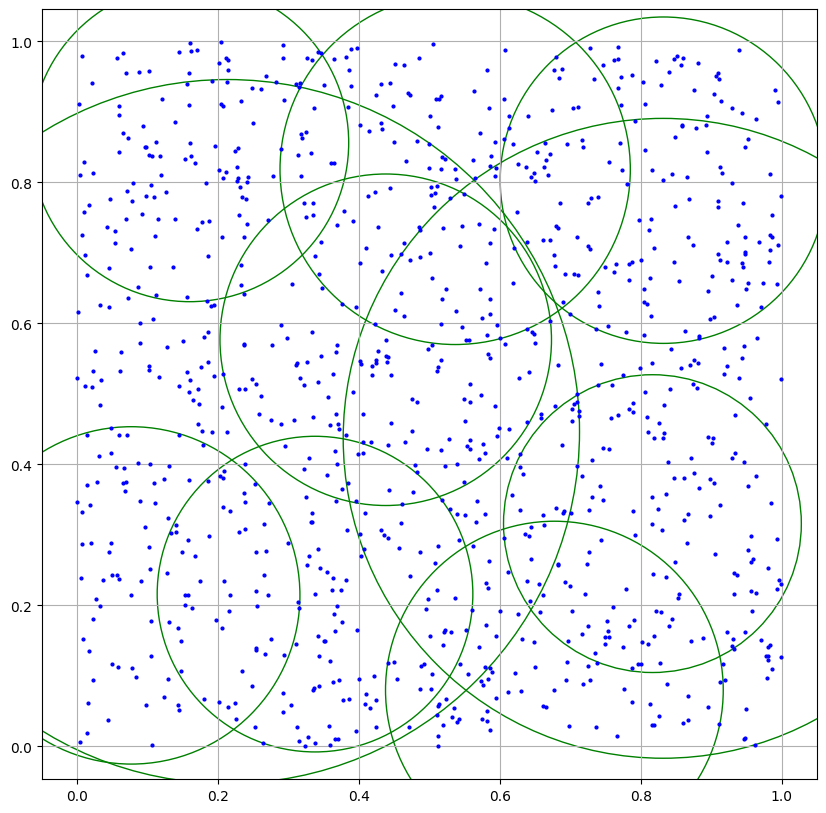

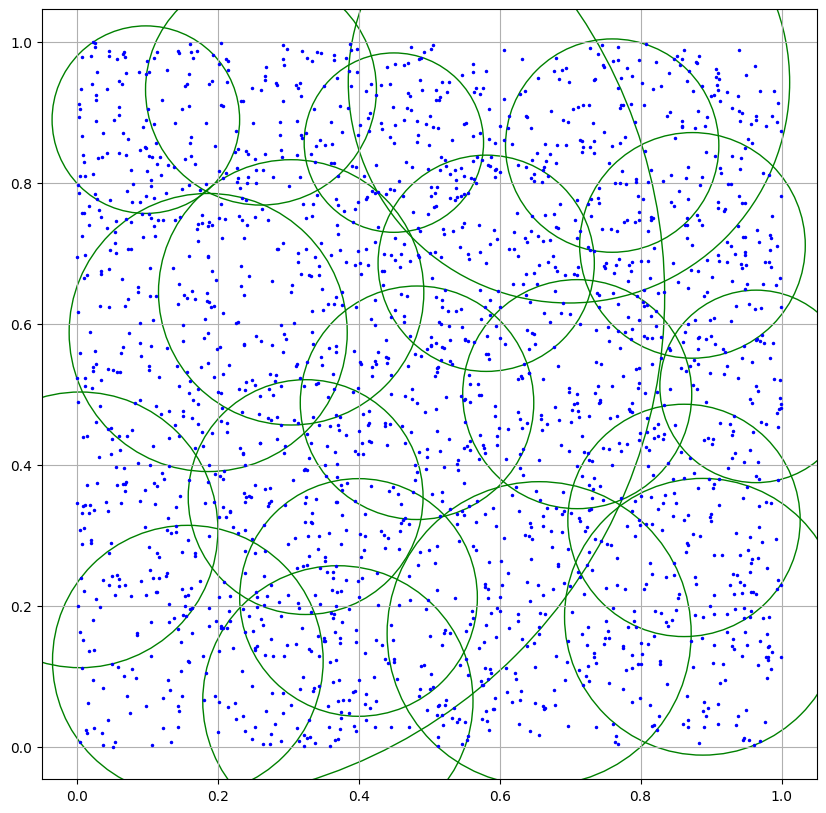

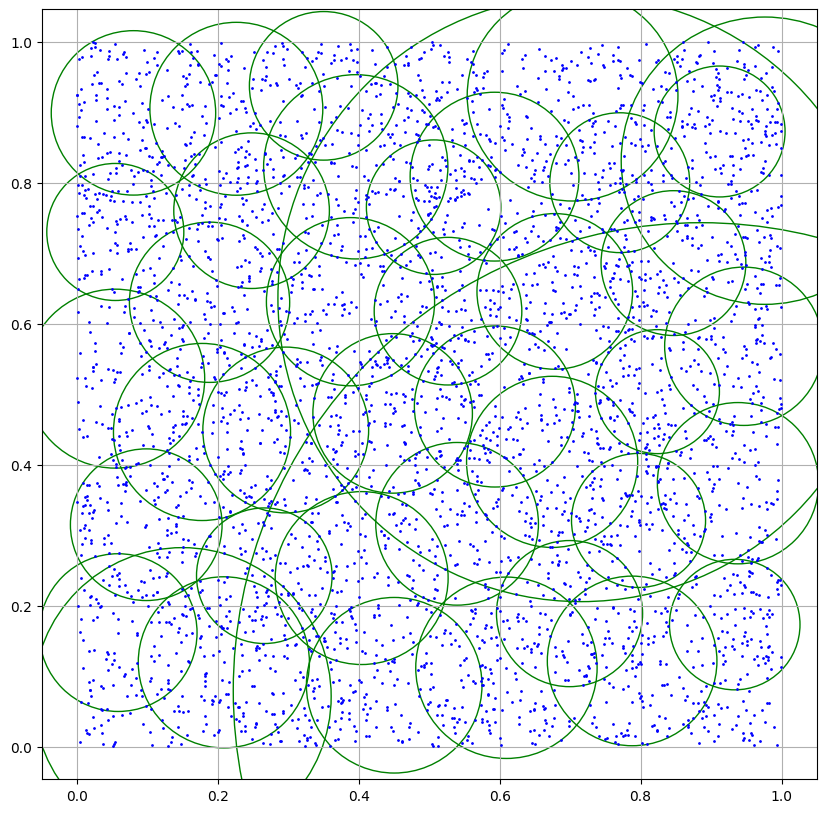

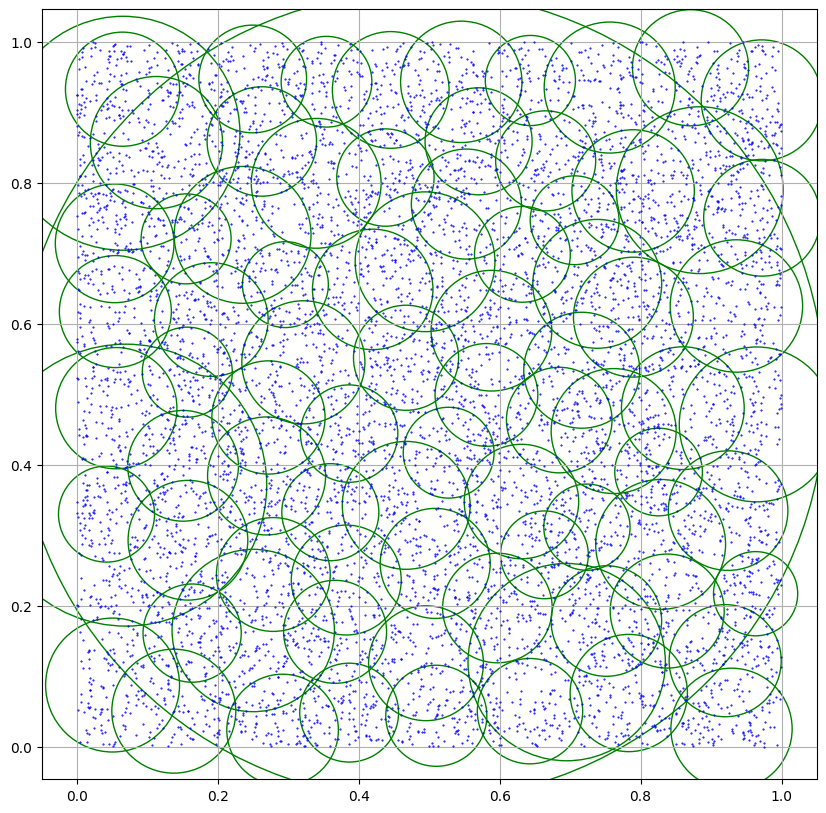

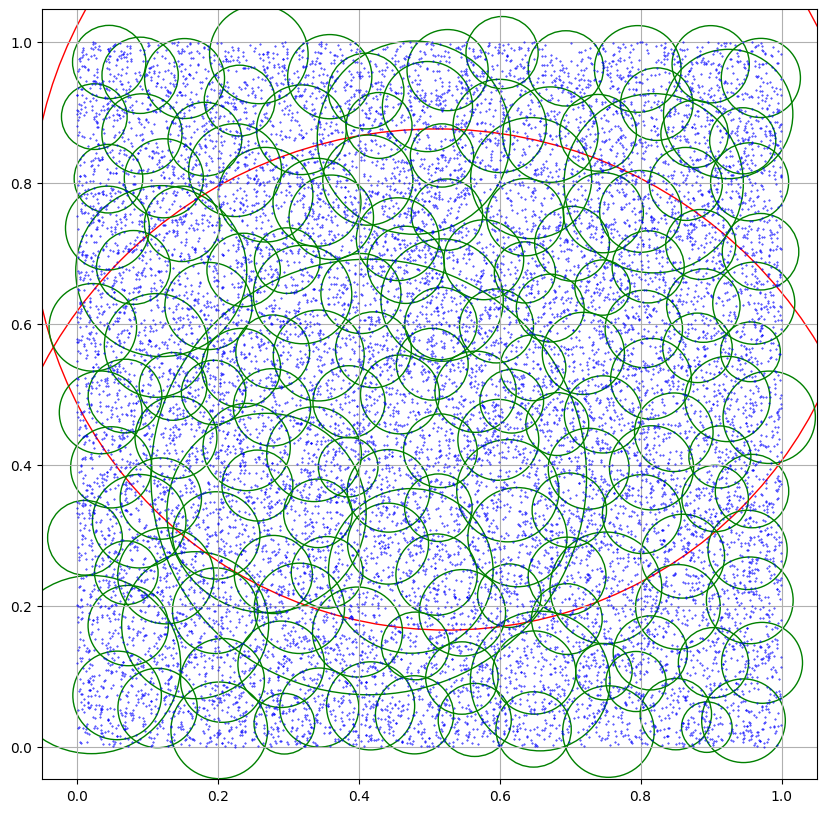

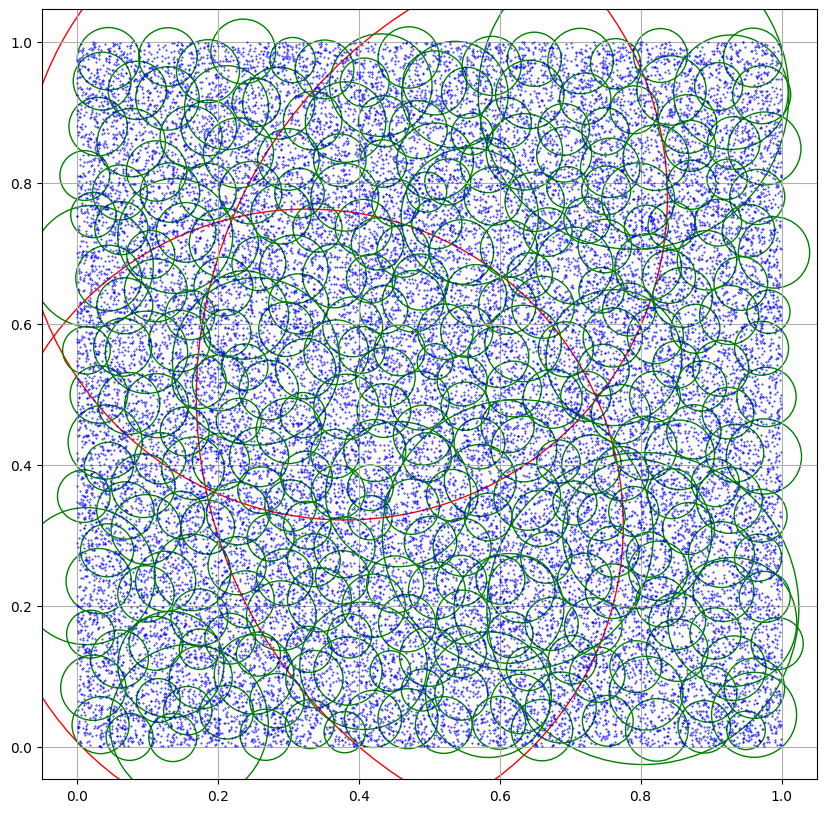

In [15]:
for size in range(10, 16):
    graph_mtree(f"ss/mtree/result/{size}.csv", size, 14);